### The below code

- Identifies the distribution of the participant predicitions to the stimulus videos
- And also the distribution of responses towards each stimulusVideo

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pilot_summary_df = pd.read_csv('../../pilot_3/analysis_data/summary_data_1.csv')
pilot_summary_df

In [ ]:
pilot_summary_df['ResponseVideo'] = pilot_summary_df['Video'].str.split('_').str[0]

# Group the data by 'Video' and count the unique 'Perceived Outcome' values
perceived_outcome_counts = pilot_summary_df.groupby('ResponseVideo')['Perceived Outcome'].value_counts().unstack(fill_value=0)
perceived_outcome_counts

In [4]:
expected_outcomes = pilot_summary_df.groupby('ResponseVideo')['Expected Outcome'].first().to_dict()
expected_outcomes

{'QID160': 'bad',
 'QID967': 'bad',
 'QID973': 'bad',
 'QID978': 'bad',
 'QID983': 'bad',
 'QID988': 'good',
 'QID993': 'bad',
 'QID998': 'bad'}

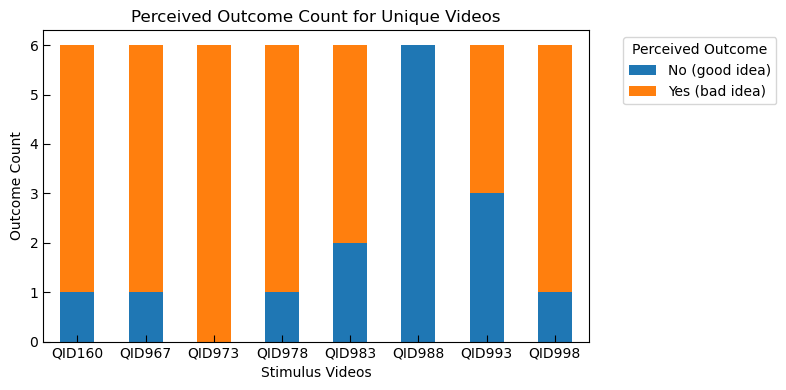

In [5]:
# Create the bar plot
ax = perceived_outcome_counts.plot(kind='bar', stacked=True, figsize=(8, 4))
plt.legend(title='Perceived Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels and a title
plt.xlabel('Stimulus Videos')
plt.ylabel('Outcome Count')
plt.title('Perceived Outcome Count for Unique Videos')

# Set the x-axis tick label rotation to 45 degrees
plt.xticks(rotation=0)

# Set the tick size for both x and y axes
ax.tick_params(axis='both', direction='in', length=5)  # Adjust the length as needed

# ax.set_xticklabels(('A1','\n\nGeneral Info', 'A2', 'B1','\n\nTechnical', 'B2', 'C1','\n\nPsycological', 'C2'),ha='center')

plt.tight_layout()
plt.show()

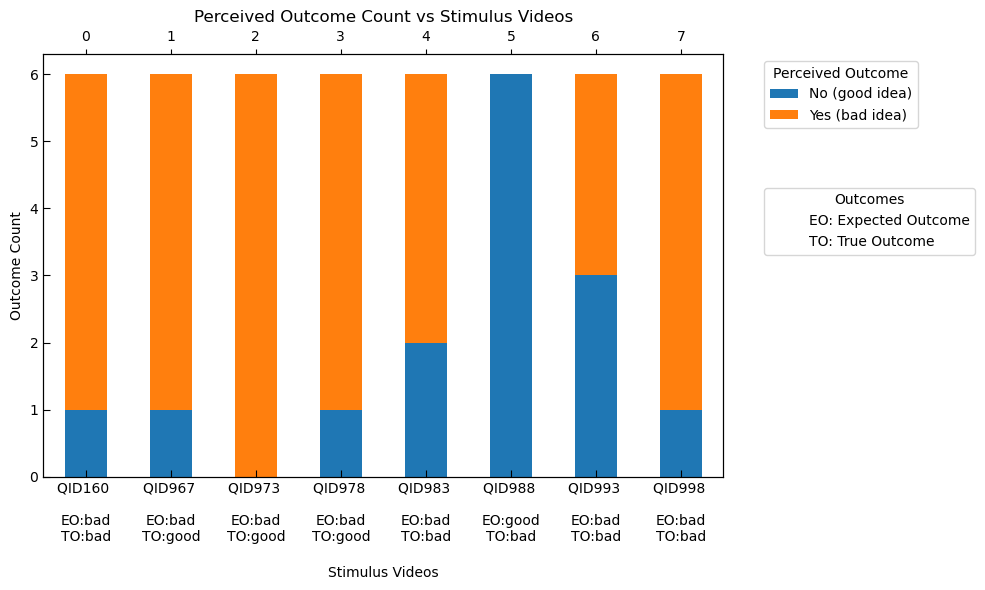

In [8]:
# Create the bar plot
ax = perceived_outcome_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.legend(title='Perceived Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')

# Get the unique 'ResponseVideo' values
response_videos = pilot_summary_df['ResponseVideo'].unique()

true_outcomes = pilot_summary_df.groupby('ResponseVideo')['True Outcome'].first().to_dict()

# Create a dictionary with 'ResponseVideo' as keys and 'Expected Outcome' as values
expected_outcomes = pilot_summary_df.groupby('ResponseVideo')['Expected Outcome'].first().to_dict()

# Create new x-axis labels by combining 'ResponseVideo' and 'Expected Outcome'
new_x_labels = [f"{response_video} \n\nEO:{expected_outcomes.get(response_video, 'N/A')}\nTO:{true_outcomes.get(response_video, 'N/A')}" for response_video in response_videos]

# Set the x-axis tick label rotation to 45 degrees
plt.xticks(range(len(new_x_labels)), new_x_labels, rotation=0)

# Set the tick size for both x and y axes
ax.tick_params(axis='both', direction='in', length=5)  # Adjust the length as needed

# Add labels and a title
plt.xlabel('\nStimulus Videos')
plt.ylabel('Outcome Count')
plt.title('Perceived Outcome Count vs Stimulus Videos')

# Create custom labels for the second legend
custom_legend_labels2 = ['EO: Expected Outcome', 'TO: True Outcome']

# Create custom labels for the second legend
custom_legend_labels2 = ['EO: Expected Outcome', 'TO: True Outcome']

# Create handles and labels for the second legend
custom_legend_handles2 = [plt.Line2D([0], [0], marker='', color='w', label=label) for label in custom_legend_labels2]

# Add the second legend to the plot
ax2 = plt.gca().twiny()
ax2.set_xlim(ax.get_xlim())
ax2.legend(custom_legend_handles2, custom_legend_labels2, title='Outcomes', bbox_to_anchor=(1.05, 0.7), loc='upper left')

plt.tight_layout()
plt.savefig('../../pilot/analysis_data/perceivedOutcomeCounts.png')
plt.show()


In [ ]:
new_df_path = '../../pilot/analysis_data/summary_data_2.xlsx'
new_df = pd.read_excel(new_df_path)
new_df

In [10]:
agreement_counts = new_df['Agreement?'].value_counts().to_dict()
agreement_counts

{'Y': 40, 'N': 8}